In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ["ALL", "BTU", "HEC", "HFF", "SPS", "SSH"]
base_models = ["DecisionTree", "AdaBoost", "RandomForest", "HistGradientBoosting"]
metrics = ["accuracy", "balanced_accuracy", "f1_score", "precision", "recall", "stdev"]

def shorten_model_names(model):
    if model.startswith(base_models[3]):
        return model.replace(base_models[3], "HGB")
    elif model.startswith(base_models[2]):
        return model.replace(base_models[2], "RF")
    elif model.startswith(base_models[1]):
        return model.replace(base_models[1], "Ada")
    elif model.startswith(base_models[0]):
        return model.replace(base_models[0], "DTree")
    else:
        return model


df = pd.read_csv("wyniki.csv", sep=';')

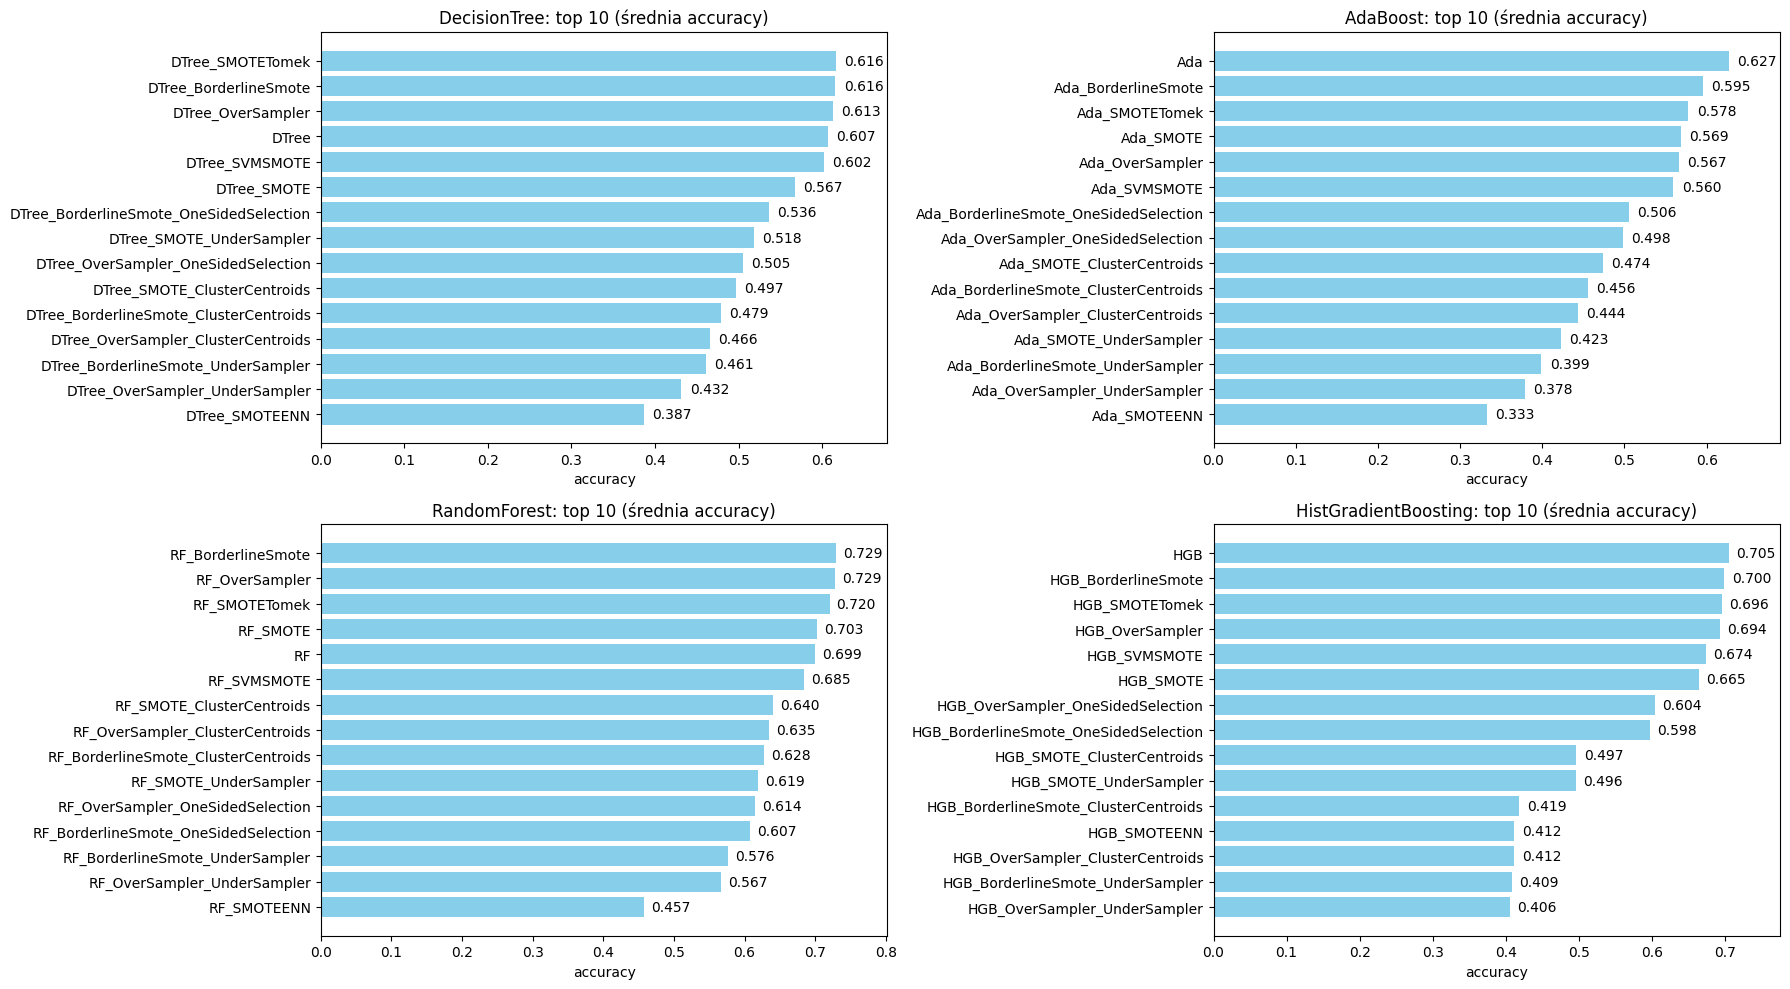

In [103]:
def model_plots(metric="accuracy"):
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    axes = axes.flatten()
    
    metric_cols = [f"{ds}_{metric}" for ds in datasets]
    for i, base in enumerate(base_models):
        ax = axes[i]

        model_rows = df[df["model"].str.startswith(base)]
        if model_rows.empty:
            ax.set_title(f"{base}: brak danych")
            ax.axis("off")
            continue

        model_rows = model_rows.copy()
        model_rows["metric_mean"] = (model_rows[metric_cols].replace(-1, pd.NA).mean(axis=1))

        valid = model_rows["metric_mean"].notna()
        top = model_rows[valid].sort_values("metric_mean", ascending=False) # .head(10)

        if top.empty:
            ax.set_title(f"{base}: brak danych")
            ax.axis("off")
            continue

        bars = ax.barh(
            top["model"].apply(shorten_model_names),
            top["metric_mean"],
            color="skyblue"
        )

        ax.set_title(f"{base}: top 10 (średnia {metric})")
        ax.set_xlabel(metric)
        ax.invert_yaxis()

        max_val = top["metric_mean"].max() * 1.1
        ax.set_xlim(0, max_val)

        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f"{width:.3f}", va="center")

    plt.tight_layout()
    plt.show()

model_plots(metric=metrics[0])

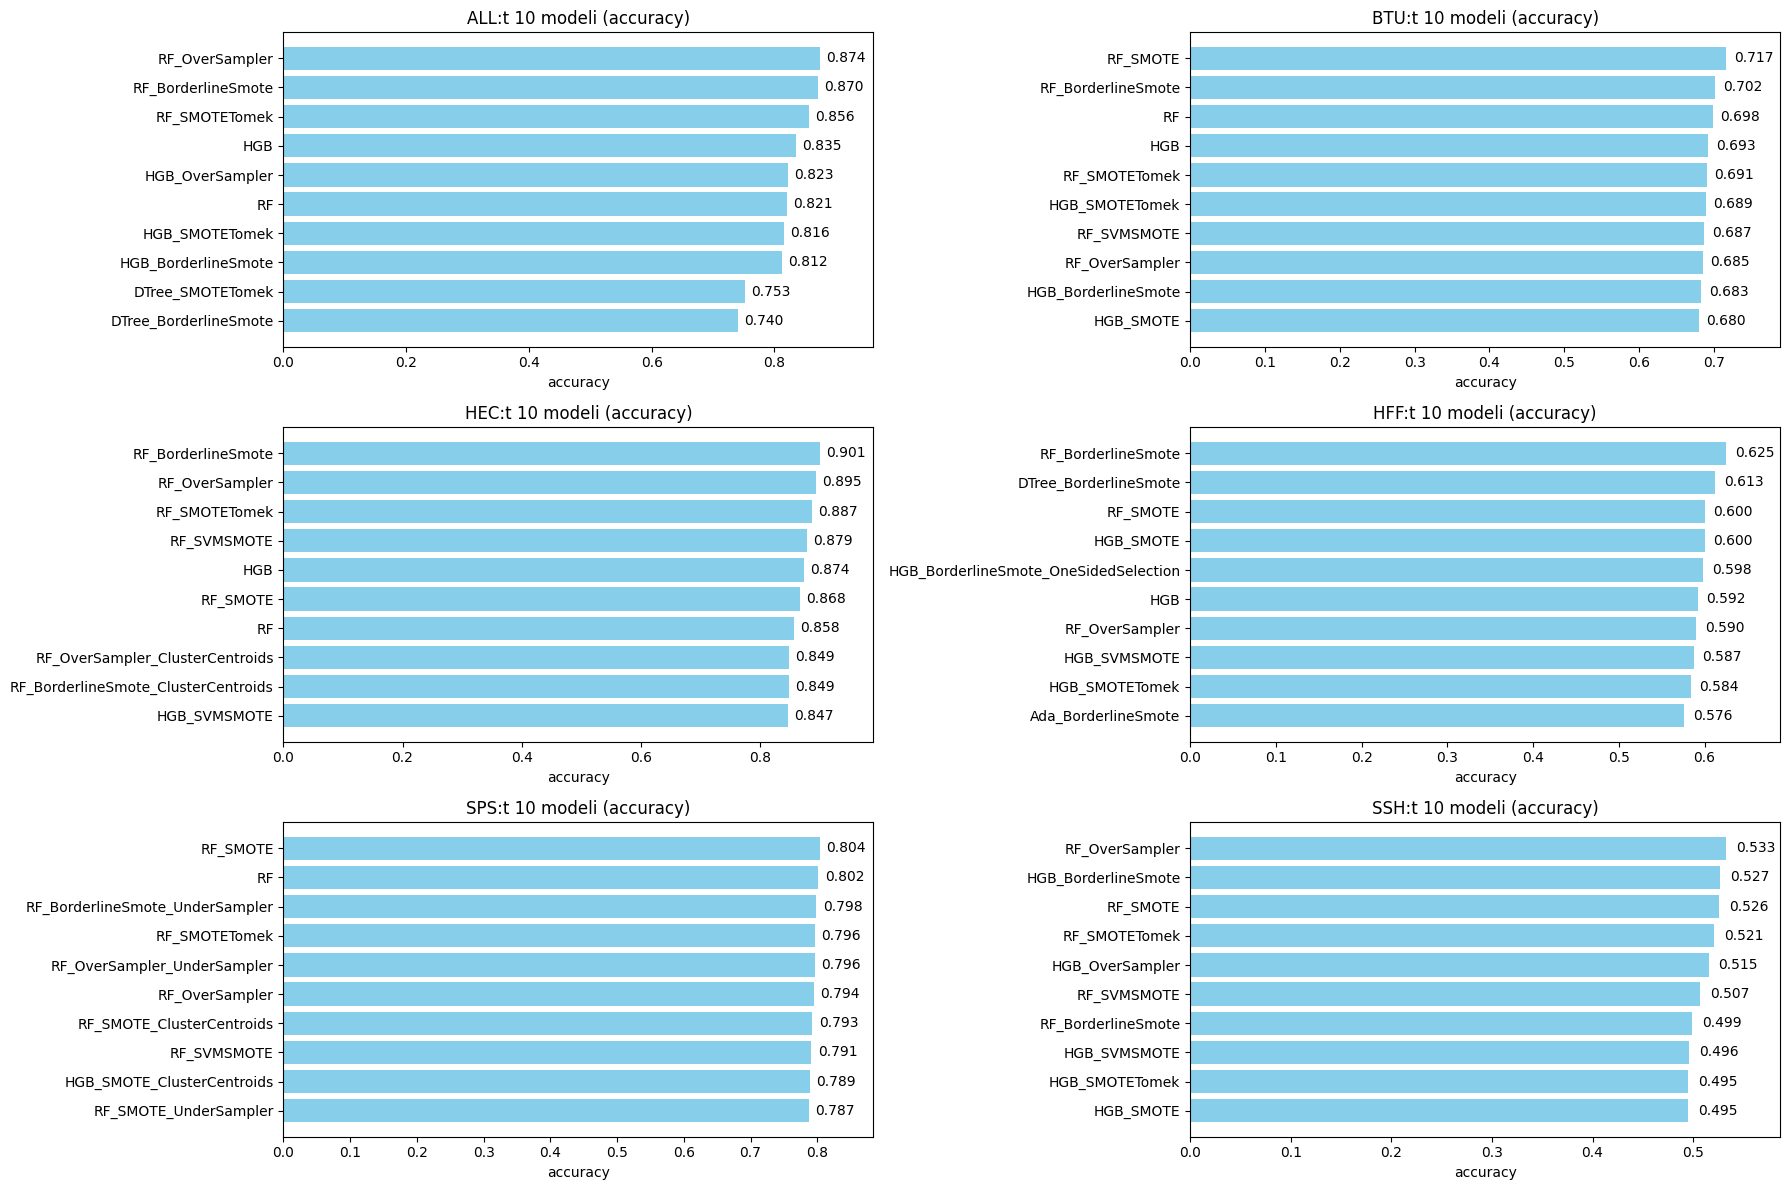

In [99]:
def dataset_plots(metric="accuracy"):
    fig, axes = plt.subplots(3, 2, figsize=(18, 12))
    axes = axes.flatten()

    for i, ds in enumerate(datasets):
        ax = axes[i]
        col = f"{ds}_{metric}"
        

        df_tmp = df[df[col].notna() & (df[col] != -1)].sort_values(col, ascending=False).head(10)
        if df_tmp.empty:
            ax.set_title(f"{ds}: brak danych")
            ax.axis("off")
            continue
        
        bars = ax.barh(df_tmp["model"].apply(shorten_model_names), df_tmp[col], color='skyblue')
        ax.set_title(f"{ds}:t 10 modeli ({metric})")
        ax.set_xlabel(metric)
        ax.invert_yaxis()
        
        max_val = df_tmp[col].max() * 1.1
        ax.set_xlim(0, max_val)
        
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()

dataset_plots(metric=metrics[0])

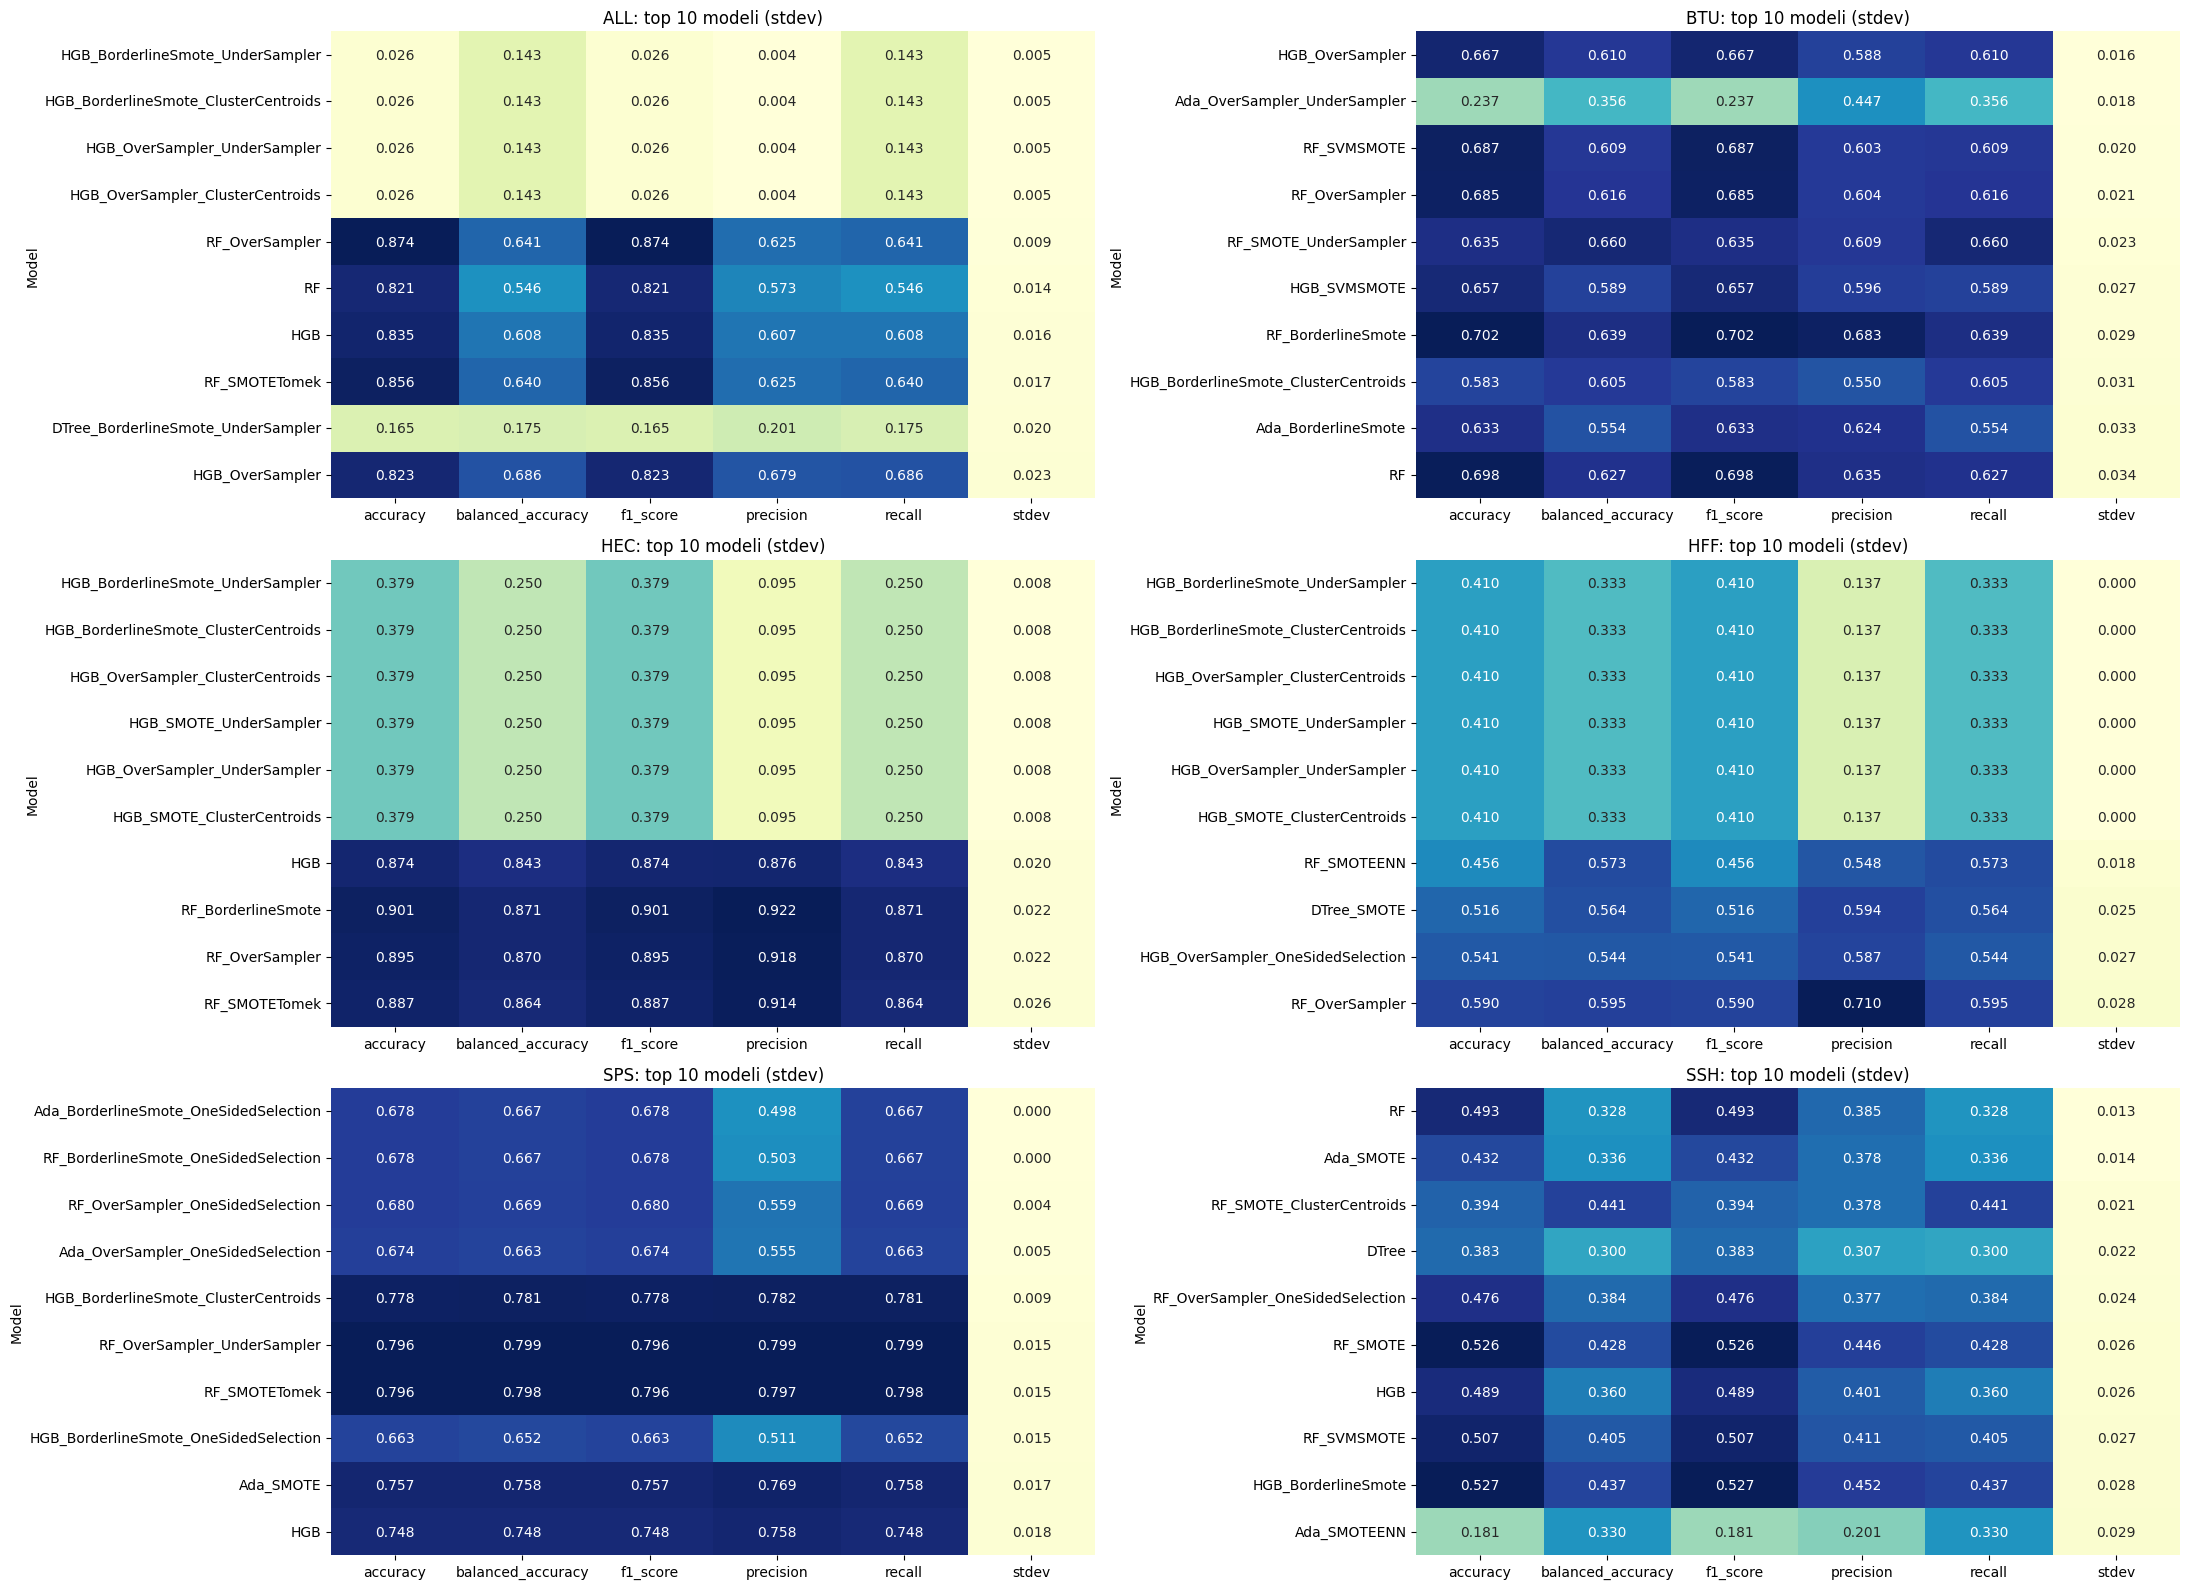

In [102]:
def heatmap_top10(sort_by="accuracy", ascending=False):
    fig, axes = plt.subplots(3, 2, figsize=(22, 16))
    axes = axes.flatten()
    
    for i, ds in enumerate(datasets):
        ax = axes[i]
        sort_col = f"{ds}_{sort_by}"
        cols = [f"{ds}_{m}" for m in metrics]
        
        valid = df[cols].notna().all(axis=1) & (df[cols] != -1).all(axis=1)
        df_tmp = df[valid].sort_values(sort_col, ascending=ascending).head(10)
        # df_tmp = df[valid].sort_values(sort_col, ascending=ascending)
        if df_tmp.empty:
            ax.set_title(f"{ds}: brak danych")
            ax.axis("off")
            continue
    
        heat_df = df_tmp[cols].copy()
        heat_df.index = df_tmp["model"].apply(shorten_model_names)
        heat_df.columns = metrics
        
        sns.heatmap(heat_df, annot=True, fmt=".3f", cmap="YlGnBu", cbar=False,  ax=ax)
        ax.set_title(f"{ds}: top 10 modeli ({sort_by})")
        # ax.set_xlabel("Metryka")
        ax.set_ylabel("Model")

    plt.tight_layout()
    plt.show()

heatmap_top10(metrics[5], ascending=True)